## ðŸŽ§ **Spotify Track Popularity Analysis**

### ðŸ“Œ **Introduction**

This project explores what makes a song popular on Spotify! ðŸŽ¶
Using a dataset of Spotify tracks, we analyze different **audio features** like danceability, energy, loudness, and tempo â€” to see how they relate to a songâ€™s **popularity** ðŸŒŸ

We also build a **Machine Learning model (Random Forest Regressor)** to predict how popular a track might be based on its musical features ðŸ¤–

### ðŸ§© **Objectives**

* ðŸ§¹ Clean and prepare the Spotify dataset
* ðŸ“Š Explore data trends and correlations
* ðŸ”¥ Identify key factors that influence track popularity
* ðŸ§  Train and evaluate a Random Forest model
* ðŸ“ˆ Gain insights for improving song success predictions

### ðŸ’¡ **Outcome**

By the end of this analysis, weâ€™ll discover which audio characteristics are most important for predicting popularity â€” and how well our model can forecast what makes a hit song! ðŸŽµðŸ’¥


In [15]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Import Spotify Dataset
spotify_data = pd.read_csv('/content/Spotify Dataset.csv')

In [17]:
# Display 5 top rows of the dataset
spotify_data.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [18]:
# Information about our dataset Ex: column names, data types, non null count etc
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [19]:
# Pre-processing
# Checking missing values
spotify_data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [20]:
# Removing null/missing values
spotify_data_cleaned = spotify_data.dropna()

In [21]:
spotify_data_cleaned.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

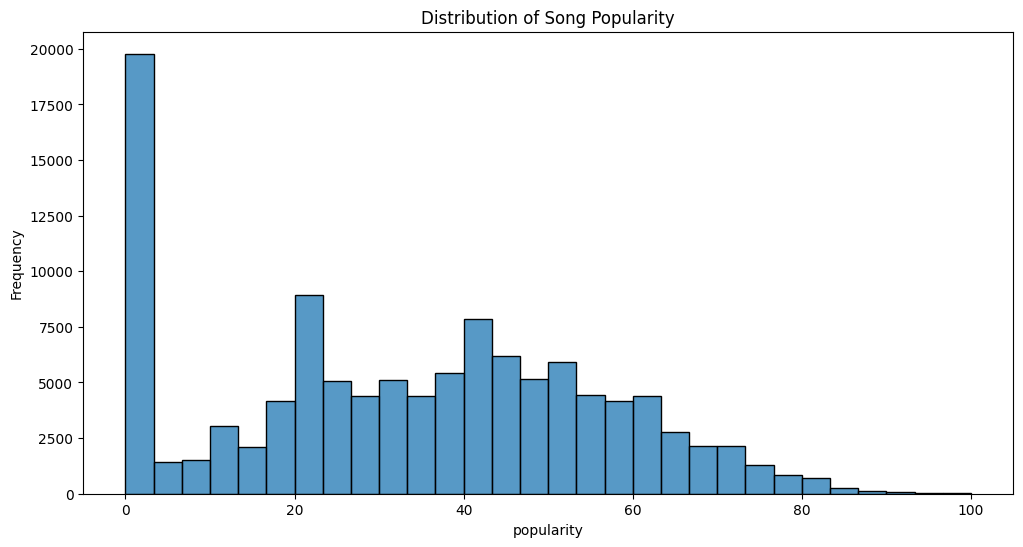

In [22]:
# Exploratory Data Analysis
plt.figure(figsize = (12,6))
sns.histplot(spotify_data_cleaned['popularity'], bins = 30)
plt.title('Distribution of Song Popularity')
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.show()

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(spotify_data_cleaned['danceability'], bins=30, color='orange')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

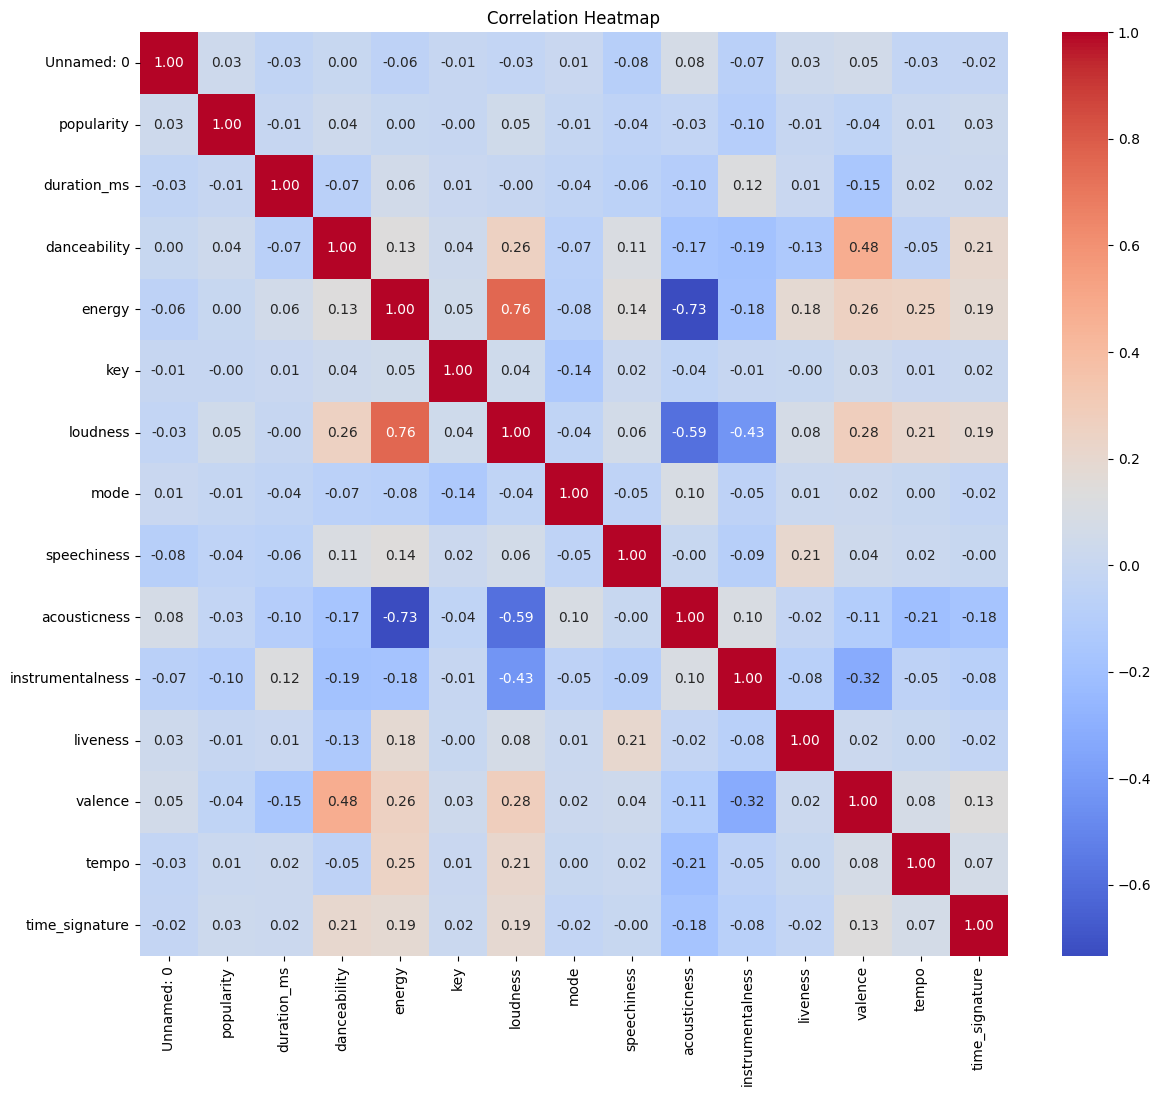

In [24]:
# Correlation Analysis
numeric_spotify_data = spotify_data_cleaned.select_dtypes(include = np.number)
correlation_matrix = numeric_spotify_data.corr()
plt.figure(figsize = (14,12))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Random Forest  Regressor Machine Learning Model


## Feature selection

### Subtask:
Select relevant features from the dataset that will be used to train the model.


**Reasoning**:
Create the features DataFrame by dropping irrelevant columns and the target Series by selecting the popularity column.



In [25]:
features = spotify_data_cleaned.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'popularity'], axis=1)
target = spotify_data_cleaned['popularity']

## Data splitting

### Subtask:
Split the cleaned data into training and testing sets.


**Reasoning**:
Split the features and target into training and testing sets.



In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a Random Forest Regressor model on the training data.


**Reasoning**:
Train a Random Forest Regressor model on the training data.



In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model evaluation

### Subtask:
Evaluate the performance of the trained model using appropriate metrics.


**Reasoning**:
Import the necessary evaluation metrics and use the trained model to make predictions on the test set. Then calculate and print the evaluation metrics.



In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 221.52
R-squared: 0.55


## Summary:

### Data Analysis Key Findings

*   Relevant features were selected for training the model by dropping columns like 'Unnamed: 0', 'track\_id', 'artists', 'album\_name', 'track\_name', and 'track\_genre'.
*   The dataset was split into training and testing sets, with 80% for training and 20% for testing.
*   A Random Forest Regressor model with 100 estimators was trained on the training data.
*   The trained model achieved a Mean Squared Error (MSE) of 221.52 and an R-squared score of 0.55 on the test set.

### Insights or Next Steps

*   An R-squared score of 0.55 indicates that approximately 55% of the variance in popularity can be explained by the features used. Further feature engineering or exploring different models could potentially improve performance.
*   Analyzing the feature importance from the trained Random Forest model could provide insights into which features are most influential in predicting song popularity.




## **Conclusion**

1. **Popularity Distribution**  
   - Most tracks cluster around moderate popularity levels. Extremely high or low popularity scores are less common, indicating a broad spread where only a small share of songs truly stand out.

2. **Danceability & Other Distributions**  
   - Danceability, energy, and loudness vary widely, suggesting no single audio feature dominates the dataset. However, upbeat characteristics tend to appear in moderately popular tracks.

3. **Correlation Insights**  
   - **Loudness** and **energy** show a strong positive correlation, implying that louder songs are usually more energetic.  
   - **Acousticness** and **energy** are strongly negative, meaning highly acoustic tracks are often less energetic.  
   - **Popularity** itself does **not** have a single standout correlation with any one feature, indicating multiple factors impact a songâ€™s success.

4. **Random Forest Feature Importance**  
   - **Acousticness, tempo, and duration_ms** emerged as top contributors to predicting popularity, followed by **danceability, valence, and speechiness**.  
   - **Key, mode, and time_signature** have relatively low influence.  
   - This suggests that while energy and loudness correlate with each other, acousticness and tempo (among others) may be more critical in driving popularity scores.

5. **Predictive Model Performance**  
   - The Random Forest Regressor can predict popularity **reasonably well**, but no single feature fully explains a trackâ€™s success. External factors (marketing, artist fan base, etc.) also likely play a role.

